In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [10]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [13]:
df.dropna(inplace=True)
# df['Age'].fillna(df['Age'].mean(), inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [15]:
df.shape

(714, 3)

In [21]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Apply Decision regression with out binning

In [24]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
y_predict = clf.predict(x_test)

In [26]:
accuracy_score(y_predict, y_test)

0.6433566433566433

In [31]:
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10))

np.float64(0.6331181533646323)

# Apply Binning using kbins


In [35]:
kbins_age = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')#quantile, 
kbins_fare = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')


In [36]:
trf = ColumnTransformer([
    ('first',kbins_age,[0]),
    ('second',kbins_fare,[1])
])

In [37]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [38]:
trf.named_transformers_['first'].n_bins_

array([5])

In [39]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', strategy='kmeans'),
 'second': KBinsDiscretizer(encode='ordinal', strategy='kmeans')}

In [40]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [41]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [42]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
869,4.0,0.0,11.1333,0.0,"(0.42, 12.696]","(0.0, 42.424]"
880,25.0,1.0,26.0000,0.0,"(12.696, 27.028]","(0.0, 42.424]"
770,24.0,1.0,9.5000,0.0,"(12.696, 27.028]","(0.0, 42.424]"
779,43.0,3.0,211.3375,3.0,"(39.354, 54.215]","(186.5, 376.606]"
875,15.0,1.0,7.2250,0.0,"(12.696, 27.028]","(0.0, 42.424]"


In [44]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [45]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [52]:
X_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6317292644757433)

In [55]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6359154929577464


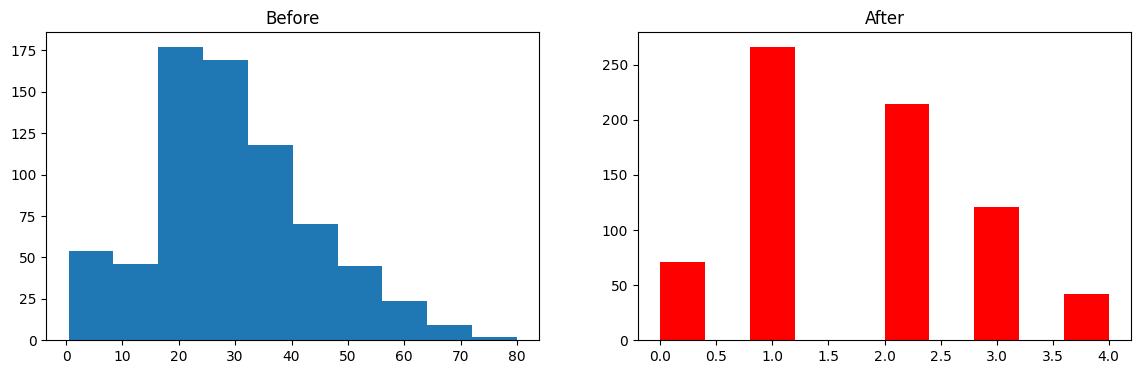

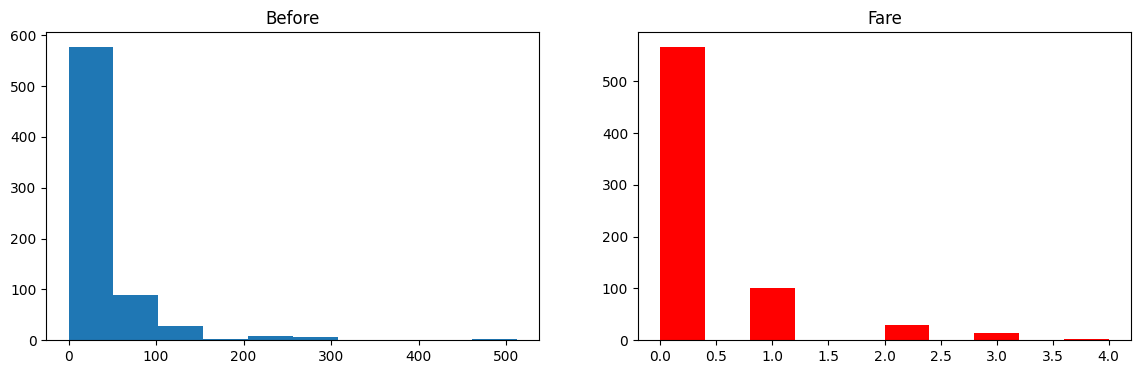

In [56]:
discretize(5,'kmeans')

0.6345266040688575


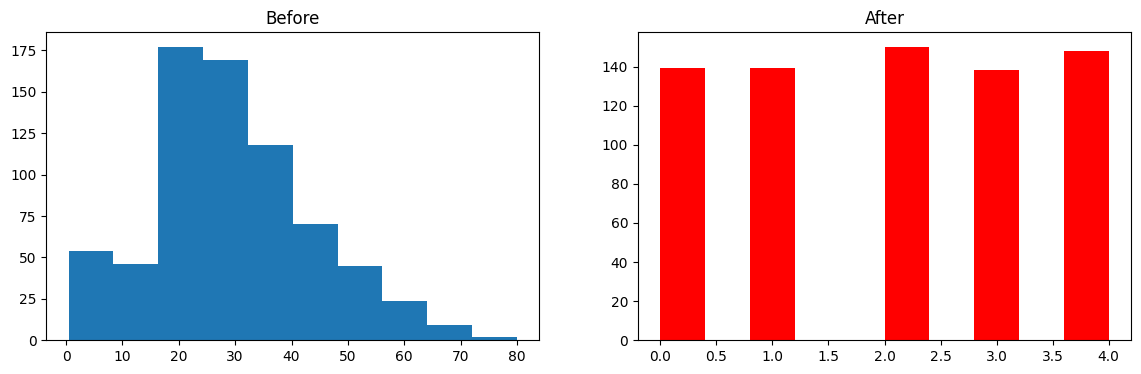

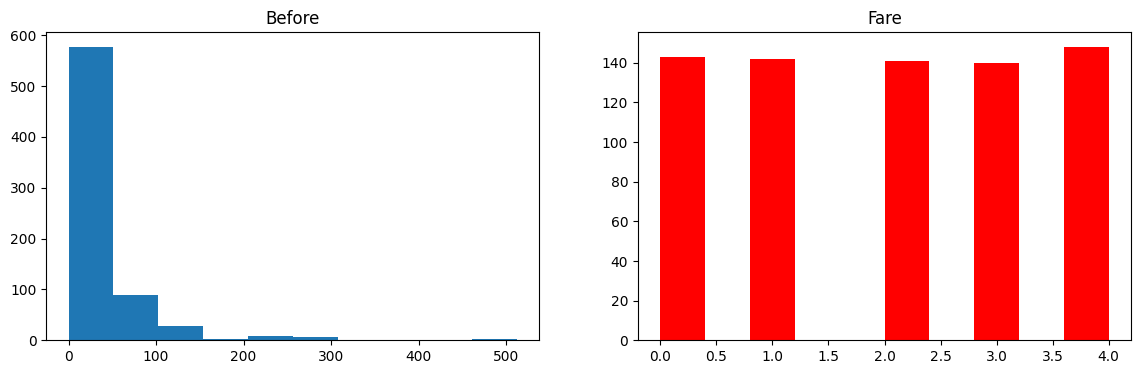

In [57]:
discretize(5,'quantile')

# Binnarization

### Binarization is the process to convert the numerical contiguos data into the binary o or 1
### it is mostly use like image processing convert it's into the black and white
### Two parameter contains  threshold and copy which value is true or false if it is true copy the data if false so real column change 

In [ ]:


# Applying Binarization

from sklearn.preprocessing import Binarizer

trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

